### Name: E.M.D.A. Bandara
### Index No: 190072E

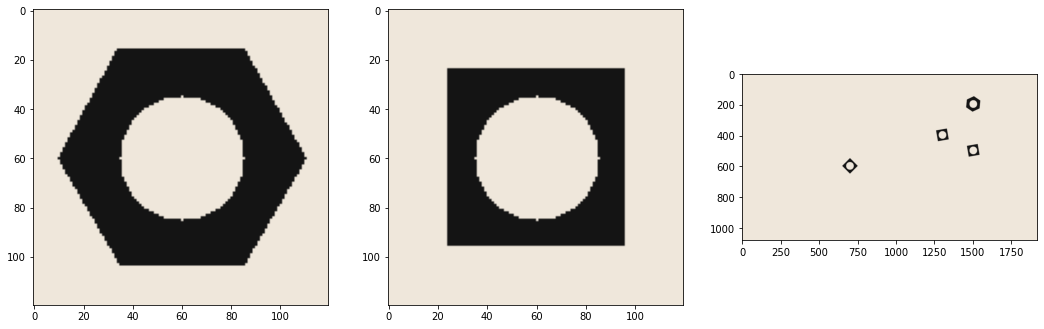

In [202]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('images/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('images/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('images/conveyor_f100.png', cv.IMREAD_COLOR)
conveyor_f101 =  cv.imread('images/conveyor_f101.png', cv.IMREAD_COLOR)

assert conveyor_f101 is not None
fig, ax = plt. subplots(1,3, figsize = (18, 6))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Text(0.5, 1.0, 'Thresholded conveyor f101 image')

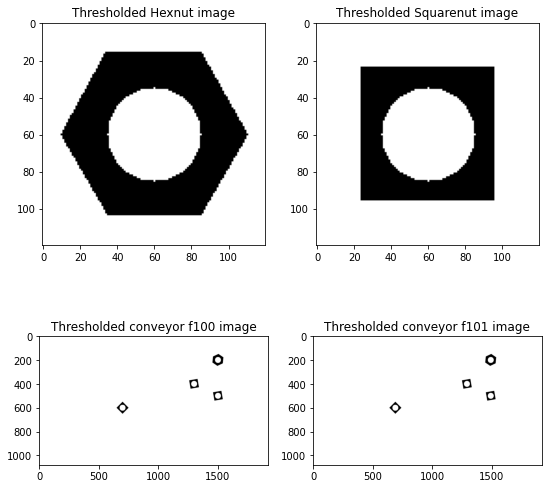

In [203]:
hexnut_grey = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_grey = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_grey = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)
conveyor_f101_grey = cv.cvtColor(conveyor_f101, cv.COLOR_BGR2GRAY)

ret1, hexnut_thresh = cv.threshold(hexnut_grey,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, squarenut_thresh = cv.threshold(squarenut_grey,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret1, conveyor_f100_thresh = cv.threshold(conveyor_f100_grey,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret1, conveyor_f101_thresh = cv.threshold(conveyor_f101_grey,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(2,2, figsize = (9, 9))
ax[0, 0].imshow(cv.cvtColor(hexnut_thresh, cv.COLOR_GRAY2BGR))
ax[0, 0].set_title("Thresholded Hexnut image")
ax[0, 1].imshow(cv.cvtColor(squarenut_thresh, cv.COLOR_GRAY2BGR))
ax[0, 1].set_title("Thresholded Squarenut image")
ax[1, 0].imshow(cv.cvtColor(conveyor_f100_thresh, cv.COLOR_GRAY2BGR))
ax[1, 0].set_title("Thresholded conveyor f100 image")
ax[1, 1].imshow(cv.cvtColor(conveyor_f101_thresh, cv.COLOR_GRAY2BGR))
ax[1, 1].set_title("Thresholded conveyor f101 image")

In [204]:
kernel = np.ones((3,3),np.uint8)
hexnut_closing = cv.morphologyEx(hexnut_thresh, cv.MORPH_CLOSE, kernel)
squarenut_closing = cv.morphologyEx(squarenut_thresh, cv.MORPH_CLOSE, kernel)
conveyor_f100_closing = cv.morphologyEx(conveyor_f100_thresh, cv.MORPH_CLOSE, kernel)
conveyor_f101_closing = cv.morphologyEx(conveyor_f101_thresh, cv.MORPH_CLOSE, kernel)

img_array = [hexnut_closing, squarenut_closing, conveyor_f100_closing, conveyor_f101_closing]
labels    = ["Hexnut", "Square Nut", "Conveyor f100", "Conveyor f101" ]
	# cv.connectedComponentsWithStats(	image[, labels[, stats[, centroids[, connectivity[, ltype]]]]]	) ->	retval, labels, stats, centroids

def displayConnectedComponentStats(img_array, img_labels):
    length = len(img_array)
    for i in range(length): 
        retval, labels, stats, centroids = cv.connectedComponentsWithStats(img_array[i])
        print("Connected component statistics of ", img_labels[i], ":")
        print("Number of connected components: ", retval)
        for j in range(stats.shape[0]):
            print(f"\tObject {j}:" )
            print(f"\t\tLeft Top corner X: {stats[j][0]} and Left Top Corner y: {stats[j][1]}")
            print(f"\t\tRight Bottom corner X: {stats[j][2]} and Right Bottom Corner y: {stats[j][3]}")
            print(f"\t\tCentroid: ({round(centroids[j][0],2)},{round(centroids[j][1],2)})")
            print(f"\t\tArea: {stats[j][4]}")

displayConnectedComponentStats(img_array, labels)

Connected component statistics of  Hexnut :
Number of connected components:  3
	Object 0:
		Left Top corner X: 11 and Left Top Corner y: 16
		Right Bottom corner X: 99 and Right Bottom Corner y: 88
		Centroid: (59.83,59.22)
		Area: 4722
	Object 1:
		Left Top corner X: 0 and Left Top Corner y: 0
		Right Bottom corner X: 120 and Right Bottom Corner y: 120
		Centroid: (59.17,59.54)
		Area: 7717
	Object 2:
		Left Top corner X: 35 and Left Top Corner y: 35
		Right Bottom corner X: 51 and Right Bottom Corner y: 51
		Centroid: (60.0,60.0)
		Area: 1961
Connected component statistics of  Square Nut :
Number of connected components:  3
	Object 0:
		Left Top corner X: 24 and Left Top Corner y: 24
		Right Bottom corner X: 72 and Right Bottom Corner y: 72
		Centroid: (59.2,59.2)
		Area: 3223
	Object 1:
		Left Top corner X: 0 and Left Top Corner y: 0
		Right Bottom corner X: 120 and Right Bottom Corner y: 120
		Centroid: (59.5,59.5)
		Area: 9216
	Object 2:
		Left Top corner X: 35 and Left Top Corner

### cv.connectedComponents With Stats function searches for white components in the black background. This function retrieves four outputs. Namely retval, labels, stats, centroids. Labels consist of labels for each identified component in the image. Stats consist of the left top and right bottom coordinates correspond to the bounding rectangle of each component. Centroids consist of the centroid coordinates calculated using image moments. 

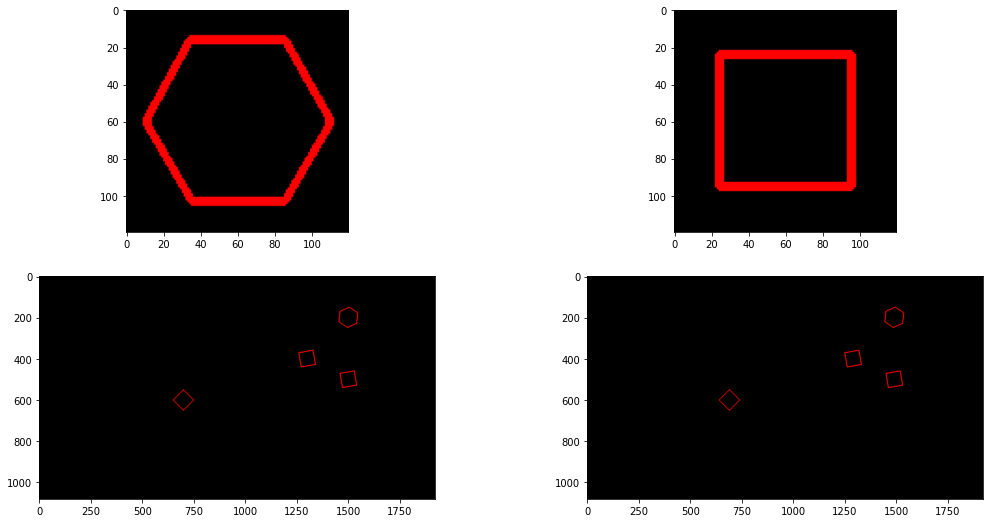

In [205]:
import random

def displayContours(img_array, labels):
    w = len(img_array)//2
    h = len(img_array)//2
    fig, ax = plt.subplots(w, h, figsize = (18, 9))
    temp_img_array = list()

    for i in range(len(img_array)):
        inverted_img = cv.bitwise_not(img_array[i]).astype('uint8')
        contours, hierachy = cv.findContours(inverted_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        temp_img_array.append(np.zeros((img_array[i].shape[0], img_array[i].shape[1], 3)).astype('uint8'))
        cv.drawContours(temp_img_array[i], contours, -1, (0,0,255), 3)
        ax[i//2, i%2].imshow(cv.cvtColor(temp_img_array[i], cv.COLOR_BGR2RGB))

displayContours(img_array, labels)

In [206]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('images/conveyor.mp4')
f = 0
frame = []
in_frames = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    in_frames.append(frame)
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()


Can't receive frame (stream end?). Exiting.


Number of Hexnuts : 1


Text(0.5, 1.0, 'Identified Hexnuts')

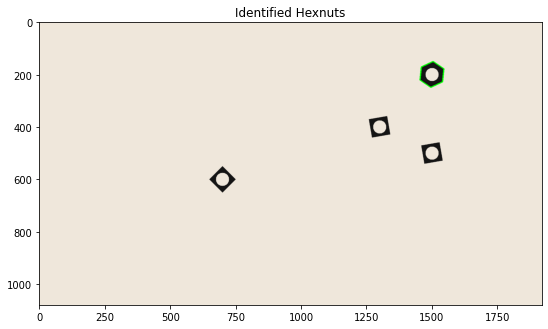

In [207]:

inverted_hexnut_img = cv.bitwise_not(hexnut_closing).astype('uint8')
inverted_squarenut_img = cv.bitwise_not(squarenut_closing).astype('uint8')
inverted_f100_img   = cv.bitwise_not(conveyor_f100_closing).astype('uint8')

contours, hierachy = cv.findContours(inverted_hexnut_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hexnut_cnt = contours[0]

contours, hierachy = cv.findContours(inverted_squarenut_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarenut_cnt = contours[0]

contours, hierarchy = cv.findContours(inverted_f100_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

num_hexnuts = 0
target_image = conveyor_f100
for contour in contours:
    ret = cv.matchShapes(hexnut_cnt,contour,1,0.0)
    if ret < 1e-2: 
        num_hexnuts += 1
        cv.drawContours(target_image, [contour], 0, (0,255,0), 3)

print(f"Number of Hexnuts : {num_hexnuts}")

fig, ax = plt.subplots(1, 1, figsize = (9, 9))
ax.imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
ax.set_title("Identified Hexnuts")


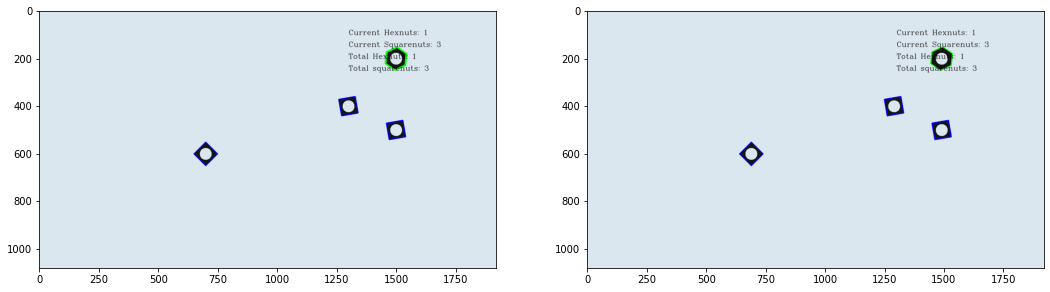

In [208]:
# Yor code here.
def countObjects(in_frames, out_frames):

    total_hexnuts = 0
    total_squarenuts = 0
    current_hexnuts = 0
    current_squarenuts = 0
    prev_hexnuts = 0
    prev_squarenuts = 0

    for i in range(len(in_frames)):
        if ( in_frames[i].shape == (1080, 1920, 3)):
            frame_grey = cv.cvtColor(in_frames[i], cv.COLOR_BGR2GRAY)
            ret, frame_thresh = cv.threshold(frame_grey,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
            frame_closing = cv.morphologyEx(frame_thresh, cv.MORPH_CLOSE, kernel)
            frame_inverted= cv.bitwise_not(frame_closing).astype('uint8')
            contours, hierarchy = cv.findContours(frame_inverted, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 

            current_hexnuts = 0
            current_squarenuts = 0
            temp_frame = in_frames[i][:, :, :]

            for contour in contours:
                if (cv.matchShapes(hexnut_cnt,contour,1,0.0) < 1e-3 and cv.contourArea(contour) > 5500): 
                    current_hexnuts += 1 
                    cv.drawContours(temp_frame, [contour], 0, (0,255,0), 3)  
                elif ( cv.matchShapes(squarenut_cnt,contour,1,0.0) < 1e-3 and cv.contourArea(contour) > 4800):
                    current_squarenuts += 1
                    cv.drawContours(temp_frame, [contour], 0, (0,0,255), 3)  

            if ( current_hexnuts > prev_hexnuts):
                total_hexnuts += (current_hexnuts - prev_hexnuts)
            if ( current_squarenuts > prev_squarenuts):
                total_squarenuts += (current_squarenuts - prev_squarenuts)

            cv.putText( temp_frame, f"Current Hexnuts: {current_hexnuts}", (1300, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA )
            cv.putText( temp_frame, f"Current Squarenuts: {current_squarenuts}", (1300, 150), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA )
            cv.putText( temp_frame, f"Total Hexnuts: {total_hexnuts}", (1300, 200), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA )
            cv.putText( temp_frame, f"Total squarenuts: {total_squarenuts}", (1300, 250), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA )
            
            prev_hexnuts = current_hexnuts
            prev_squarenuts = current_squarenuts
            out_frames.append(temp_frame[:, :, :])

in_frame_array = [conveyor_f100, conveyor_f101]
out_frame_array = []


countObjects(in_frame_array, out_frame_array)

fig, ax = plt.subplots(1, 2, figsize = (18, 9))
ax[0].imshow(out_frame_array[0])
ax[1].imshow(out_frame_array[1])

# Writing the video

frame_array = []
shape = (1080, 1920, 3)
countObjects(in_frames, frame_array)
# # Your code here


out = cv.VideoWriter('images/conveyor_result_190072E.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()
